# LOAN STATUS PREDICTION

**Project Contents (Planned):**

* Project Hypothesis
* Data Collection (DataSet)
* Exploratory Data Analysis (EDA)
* Data Cleaning (Data Pre-processing)
* Model Development
* Evaluation
* Conclusions

## Project Hypothesis

Possible Contributors in the project could be:

1. Education: Higher the level of education, higher the chances of getting loan approved.
2. Income: Income and Loan approval should be **directly propotional** factors.
3. Loan Amount: Loan amount and chances of loan approval should be **inversely propotional** factors.
4. Loan Term: Loan term and chances of loan approval should be **inversely propotional** factors.
5. Credit history: Applicants who have repayed their previous debts should have higher chances of loan approval


## DataSet 
*Source: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset (Kaggle)*

The test set contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data. There are:
* 15 columns of features and 614 rows of records in the training set
* 14 columns of features and 367 rows of records in the test set.

## EDA (Exploratory Data Analysis)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data=pd.read_csv('Minor_Project_train.csv',index_col='S.No.')
test_data=pd.read_csv('Minor_Project_test.csv',index_col='S.No.')

In [4]:
#Using Data Copy to prevent changes to original Data
train = train_data.copy()
test = test_data.copy()

In [73]:
#Training DataSet with dependant variable 'Loan_Status'
train = train.drop('Rate_of_Interest',axis=1)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Purpose,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
S.No.,,,,,,,,,,,,,,
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,debt_consolidation,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,credit_card,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,debt_consolidation,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,debt_consolidation,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,credit_card,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 14)

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Purpose', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Purpose            614 non-null    object 
 10  Loan_Amount_Term   600 non-null    float64
 11  Credit_History     564 non-null    float64
 12  Property_Area      614 non-null    object 
 13  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 72.0+ KB


In [8]:
# Dropping Purpose column as it is not relevant to the Analysis
train = train.drop(["Purpose"],axis=1)
train.columns, train.shape

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 (614, 13))

Based on above information we can split our data variables (columns) into 2 types:
1. Categorical Values - The object type variables
2. Numerical Values - float64 and int64 type variables

We have to divide data into numerical and categorical data because statistical methods can only be used with certain data types and enable us to choose the correct analytic method.

In [9]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                       'Property_Area','Credit_History']

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

* For categorical features we can use frequency table or bar plots to calculate the number of each category in a particular variable. 
* For numerical features, a histogram or a box-plot can be used to look at the distribution of the variable.

## Univariate Analysis

In [10]:
#Dependent Variable (Categorical)
print(train['Loan_Status'].value_counts())
train['Loan_Status'].value_counts(normalize=True)*100

Y    422
N    192
Name: Loan_Status, dtype: int64


Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan_Status')

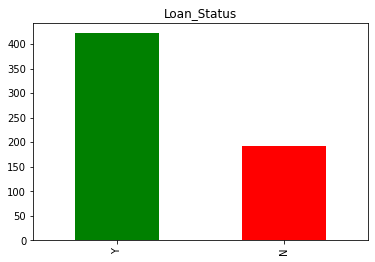

In [11]:
train['Loan_Status'].value_counts().plot.bar(color=['green','red'])
plt.title('Loan_Status')

_The loan of ~69% people out of 614 was approved_

<AxesSubplot:title={'center':'Education'}>

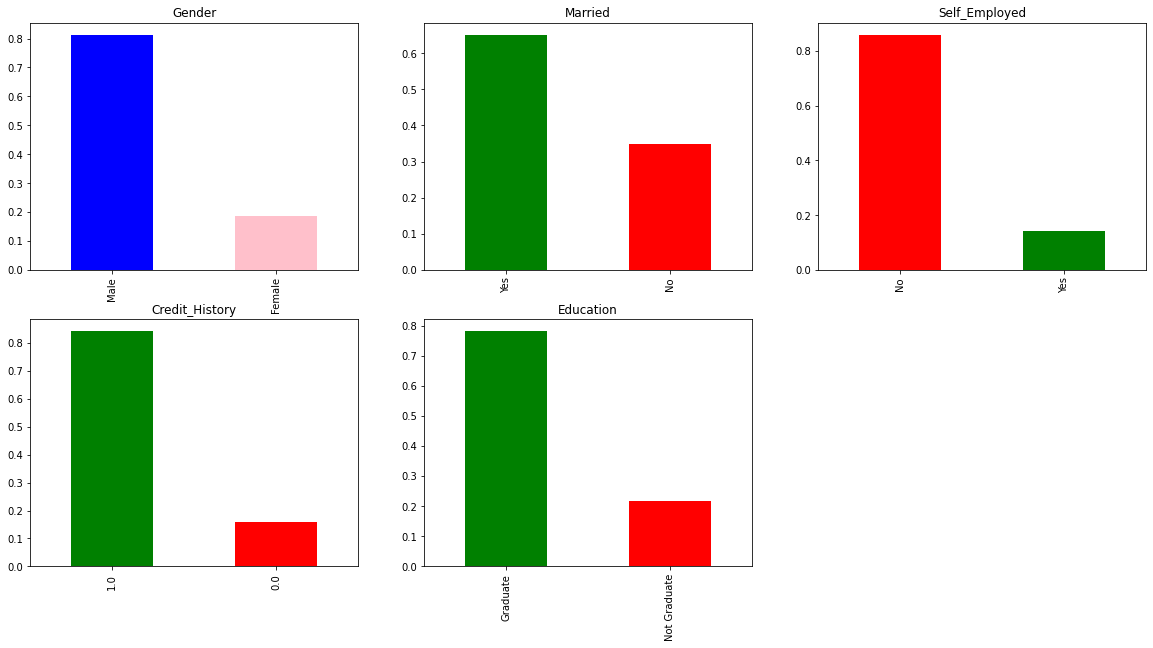

In [12]:
#Independent Variables (Categorical)

plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color=['blue','pink'])
plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married', color=['green','red'])
plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed', color=['red','green'])
plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History', color=['green','red'])
plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education', color=['green','red'])

* _80% applicants in the dataset are male._
* _~65% of the applicants are married._
* _Only ~15% applicants are self employed._
* _~85% applicants have credit history._
* _~80% of the applicants are Graduate._

<AxesSubplot:title={'center':'Property_Area'}>

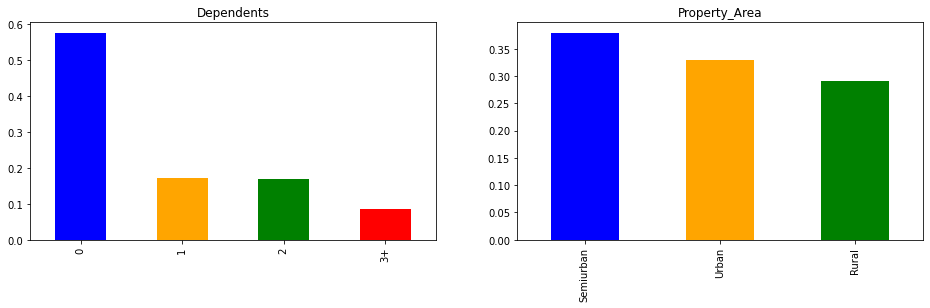

In [13]:
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(16,4), title= 'Dependents', 
                                                          color=['blue','orange', 'green', 'red'])
plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area', color=['blue','orange', 'green'])

* _More than half of the applicants have 0 dependents._
* _The property Area split is quite uniform (~.05 difference between each categories)._

In [14]:
# Independent Variables (Numerical)
train[numerical_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


<AxesSubplot:title={'center':'Loan_Amount_Term'}>

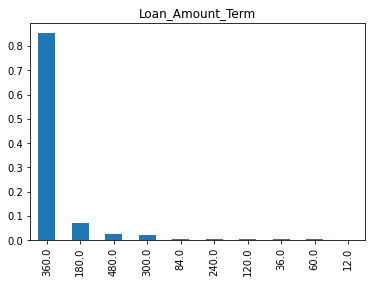

In [15]:
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

* _More than 80% of loans are taken for 360 months (30 years)._

<AxesSubplot:>

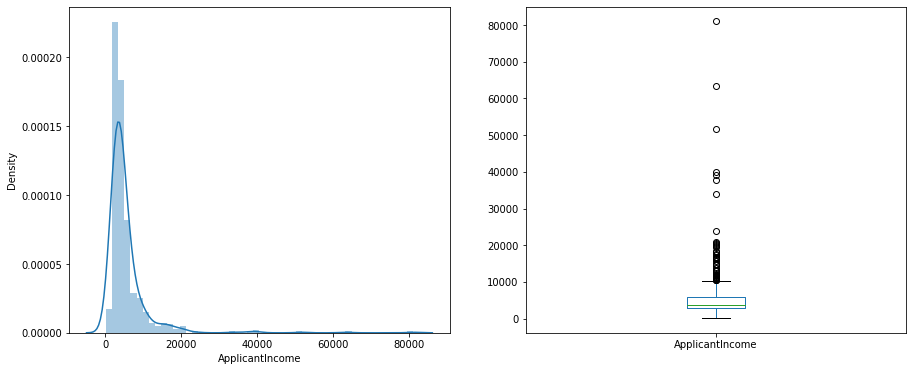

In [16]:
plt.subplot(121)
sbn.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(15,6))

* _Normal Distribution NOT present_
* _Outliers are Present_

<AxesSubplot:>

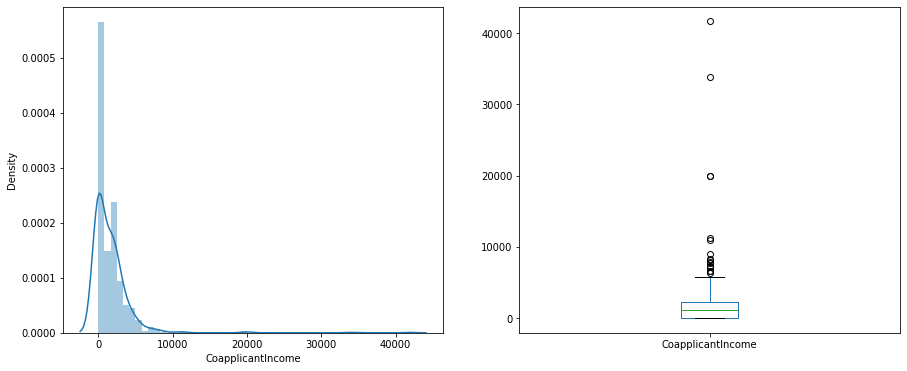

In [17]:
plt.subplot(121)
sbn.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(15,6))

* _Majority of coapplicant’s income ranges from 0 to 5000_
* _Normal Distribution NOT present_
* _Outliers are Present_

<AxesSubplot:>

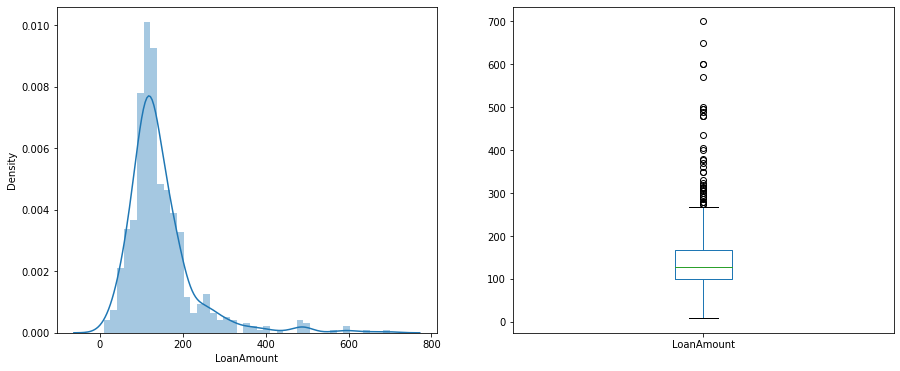

In [18]:
plt.subplot(121)
sbn.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(15,6))

* _Distribution is better (fairly normal) than previous variables_
* _A lot of outliers are present_

**Conclusions from Univariate Analysis:**

1. ~69% i.e. About 2/3rd of applicants have been granted loan.
2. 80% applicants in the dataset are male.
3. ~65% of the applicants are married.
4. Only ~15% applicants are self employed.
5. ~85% applicants have credit history.
6. ~80% of the applicants are Graduate.
7. More than half of the applicants don’t have any dependents.
8. Most of the applicants are from Semiurban area followed by urban areas.
9. More than 80% of loans are taken for 360 days (1 year).
10. The Applicant Income is not Normalised and has some outliers.
12. Coapplicant Income is lesser than Applicant Income and is in range 0-5000 with some outliers.
11. Loan Amount is mostly Normalised and has a lot of outliers present.

## Bivariate Analysis

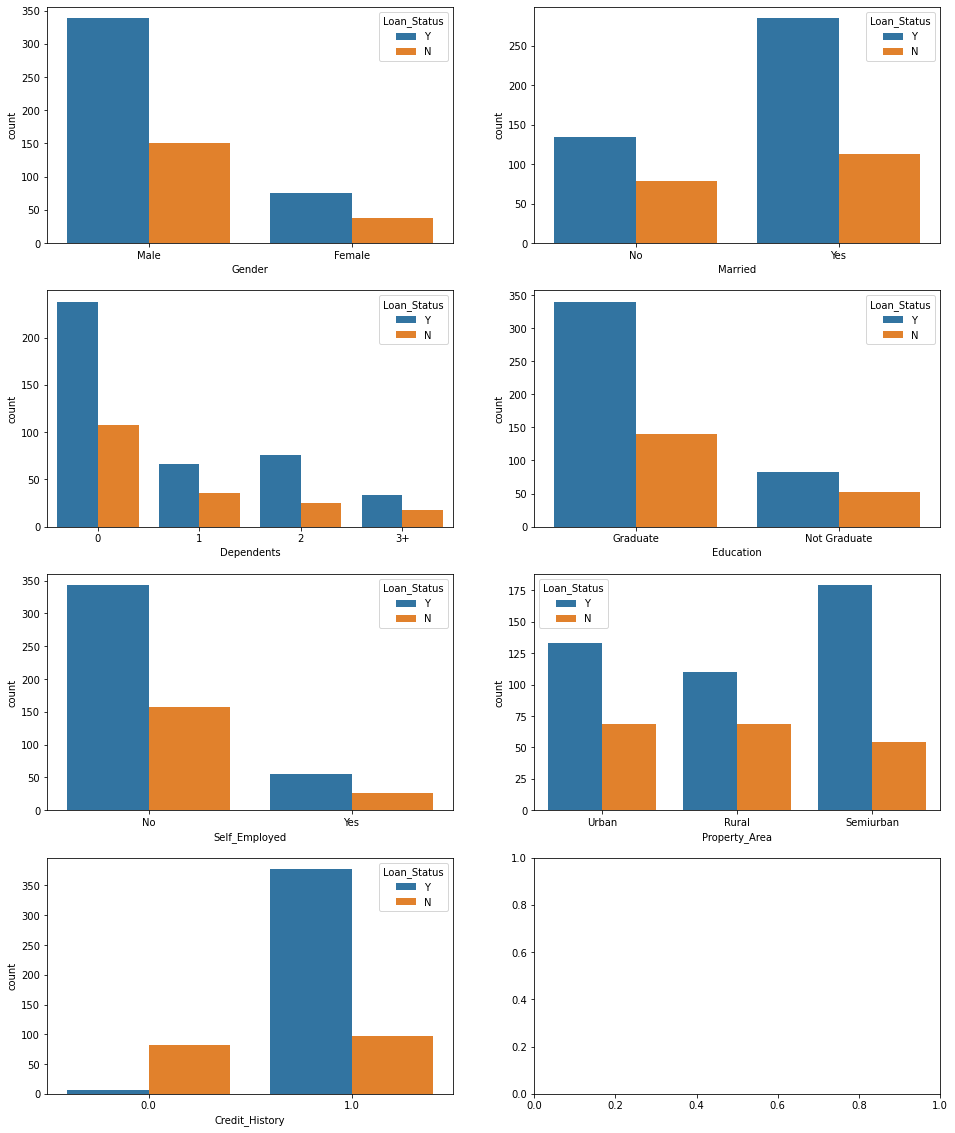

In [19]:
#categorical
fig,axes = plt.subplots(4,2,figsize=(16,20))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sbn.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])

* Gender: Proportion of male and female applicants is more or less same for both approved and unapproved loans 
* Martial Status: Married applicants are more likely to be granted loans.
* Dependents: Majority of the population have zero dependents and are also likely to be accepted for loan and distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
* Education: Proportion of loans getting approved for graduates is higher compared to non-graduates
* Self Employed: No significant relation between Self_Employed and Loan_Status.
* Property Area: Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.
* Credit History: Applicant with credit history (1) are far more likely to be accepted.

In [20]:
#numerical
train[numerical_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


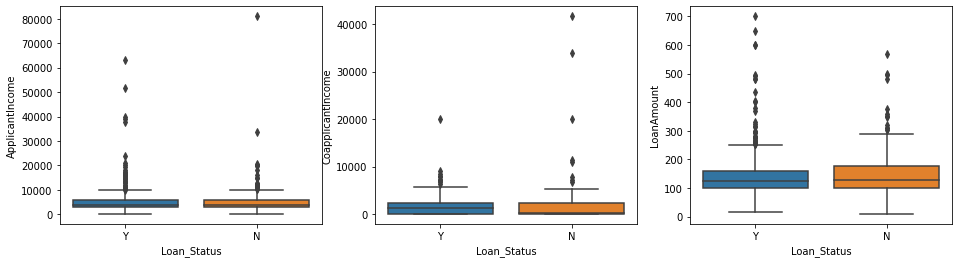

In [21]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(1,3,figsize=(16,4))
for idx,cat_col in enumerate(numerical_columns):
    sbn.boxplot(y=cat_col,data=train,x='Loan_Status',ax=axes[idx])

_Contradictory to our hyothesis,there is no SIGNIFICANT relation to Loan approval status for Applicant Income, Co-AplicantIncome and Loan Amount. We can create another variable for analysis combining Applicant's Income with Co-Applicant's Income to compare Loan Status with total Combined Income_

In [22]:
train['Combined_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

<AxesSubplot:xlabel='Loan_Status', ylabel='Combined_Income'>

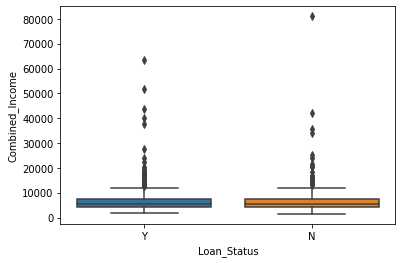

In [23]:
sbn.boxplot(y='Combined_Income',data=train,x='Loan_Status')

As predicted before, there is no SIGNIFICANT co-relation between Combined Income and Loan Approval Status as well hence we drop it for now.

In [24]:
train = train.drop('Combined_Income',axis=1)

**Co-Relation Analysis (Co-relation Matrix)**

In [25]:
# replacing 3+ in Dependents variable with 3 for co-relation anaysis
train['Dependents'].replace('3+', 3, inplace=True)

In [26]:
# replacing Y and N with binaries (0 and 1) for co-relation anaysis
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [27]:
# Using  corr() to compute pairwise correlation of columns excluding null values
Corr_Matrix = train.corr()
Corr_Matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

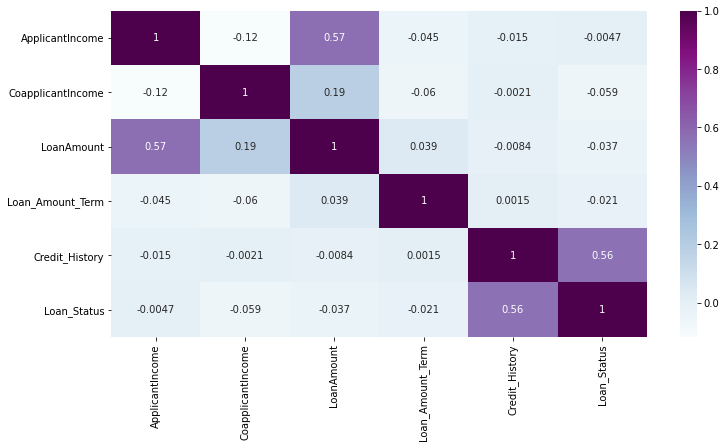

In [28]:
#Using a Heatmap for further Analysis
plt.subplots(figsize=(12,6))
sbn.heatmap(Corr_Matrix,annot=True,cmap="BuPu")

Based on Heatmap we can derive that:
* ApplicantIncome and LoanAmount have positive correlation (+0.57)
* Credit_History and Loan_Status have positive correlation (+0.56)
* LoanAmount and Coapplicant Income have positive correlation (+0.19)

### EDA Conclusions and Results Summary

**Univariate and Bivariate Analysis**

1. Loan Status: **Majority** (about 2/3rd) of applicants were granted loan
2. Gender: **Majority** of applicants in the dataset were male. The Loan Approval rate was **almost equal** for both Males and Females
3. Marital Status: **Majority** of the applicants were married. Married applicants were **more likely** to be granted loans
4. Self Employment Status: **Minority** of people were self Employed. No significant relation between Self_Employed and Loan_Status was analysed
5. Credit History: **Majority** of applicants had credit history and applicants with credit history were **far more likely** to have their loan Approved
6. Education: **Majority** of the applicants were Graduate (Educated) and Proportion of loans getting approved for graduates was **higher** compared to non-graduates
7. Dependents: **Majority** (more than half) of the applicants had 0 dependents and were also **likely to be accepted** for loan. Distribution of applicants with 1 or 3+ dependents was similar across both the categories of Loan_Status.
8. Property Area: **Majority** of the applicants were from Semiurban area followed by urban areas. Proportion of loans getting approved in semiurban area was **higher** as compared to that in rural or urban areas.

9. Loan Term: **Majority** of loans are taken for 360 months (30 years). It had no impact on Loan Approval
10. Applicant Income: The Applicant Income is not Normalised and has some outliers. No significant impact on loan approval distribution was observed
12. Coapplicant Income: Coapplicant Income is lesser than Applicant Income and is in range 0-5000 with some outliers. No significant impact on loan approval distribution was observed
11. Loan Amount: Loan Amount is mostly Normalised but a lot of outliers present.No significant impact on loan approval distribution was observed
13. Combined Income (applicant Income and Co-Applicant Income): No significant co-relation between Combined Income and Loan Status was observed.

**Co-Relation Analysis**

3 factors were observed to have a positive co-relation:
1. ApplicantIncome and LoanAmount
2. Credit_History and Loan_Status
3. LoanAmount and Coapplicant Income

_---------------------------------------------------Review 2 Presentation end------------------------------------------------_

# Data Pre-Processing

Calculating the no. of null values present in each column:

In [74]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Purpose               0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:ylabel='S.No.'>

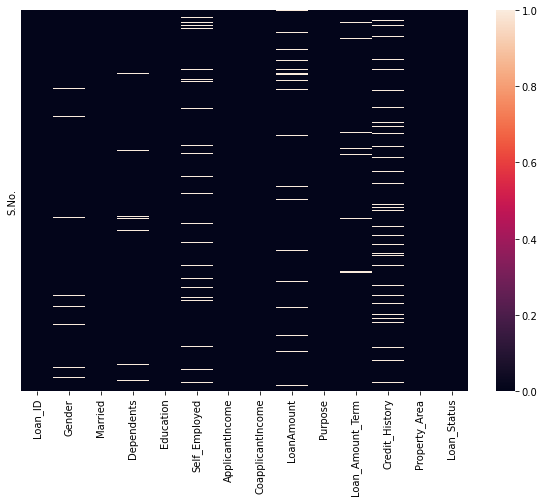

In [81]:
plt.figure(figsize=(10,7))
sbn.heatmap(train.isnull(),yticklabels=False)

**According to EDA analysis, we found out that our dataset is not normalised, hence we Prepare data for model training i.e. removing ouliers , filling null values , removing skewness**

## Training DataSet

In [30]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

_There are very less missing values in Non-Categorical (Numerical) features so we can fill them using the **mode** of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset._

### Gender

In [82]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [83]:
print("Before:")
train['Gender'].value_counts()

Before:


Male      489
Female    112
Name: Gender, dtype: int64

In [84]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
print("After:")
train['Gender'].value_counts()

After:


Male      502
Female    112
Name: Gender, dtype: int64

### Married

In [85]:
train['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [86]:
print("Before:")
train['Married'].value_counts()

Before:


Yes    398
No     213
Name: Married, dtype: int64

In [87]:
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
print("After:")
train['Married'].value_counts()

After:


Yes    401
No     213
Name: Married, dtype: int64

### Dependents

In [88]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [89]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [90]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

### Self Employed 

In [91]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [92]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [93]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

### Credit History

In [94]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [95]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [96]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

### Loan Amount Term 

In [97]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [98]:
train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

*Observing the above, value 360.000 is the most repeated term which is also the mode and median value.*

Hence, we fill NaN values with **either mode or median value** (as they are both same values)

In [99]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### Loan Amount

In [100]:
train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [101]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

_As we confirmed in EDA, Loan Amount has a lot of outliers present in it. Hence, We will use **median** to fill the null values because mean is highly affected by the presence of outliers._

In [102]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['LoanAmount'].value_counts()

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [103]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Purpose              0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:ylabel='S.No.'>

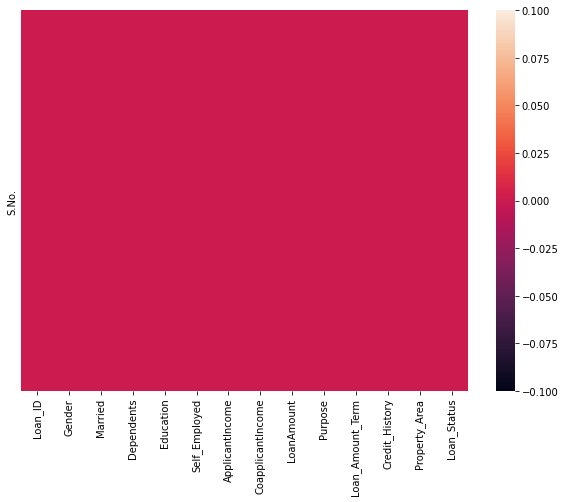

In [104]:
plt.figure(figsize=(10,7))
sbn.heatmap(train.isnull(),yticklabels=False)

### Outlier Treatment

As observed in EDA, our dataset contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution.

In [34]:
#Before Outlier Treatment and Coversion to normally distributed data

print("\nMean:\n")
print("ApplicantIncome: ",(train["ApplicantIncome"]).mean())
print("CoapplicantIncome: ",(train["CoapplicantIncome"]).mean())
print("LoanAmount: ",(train["LoanAmount"].mean()))

print("\nMode:\n")
print("ApplicantIncome: ",train["ApplicantIncome"].mode()[0])
print("CoapplicantIncome: ",train["CoapplicantIncome"].mode()[0])
print("LoanAmount: ",train["LoanAmount"].mode()[0])

print("\nMedian:\n")
print("ApplicantIncome: ",(train["ApplicantIncome"]).median())
print("CoapplicantIncome: ",(train["CoapplicantIncome"]).median())
print("LoanAmount: ",(train["LoanAmount"].median()))

print("\nStandard Deviation:\n")
print("ApplicantIncome: ",(train["ApplicantIncome"]).std())
print("CoapplicantIncome: ",(train["CoapplicantIncome"]).std())
print("LoanAmount: ",(train["LoanAmount"].std()))


Mean:

ApplicantIncome:  8.341213093227006
CoapplicantIncome:  4.289733227820409
LoanAmount:  4.857444178729352

Mode:

ApplicantIncome:  7.824046010856292
CoapplicantIncome:  0.0
LoanAmount:  4.787491742782046

Median:

ApplicantIncome:  8.246040412315828
CoapplicantIncome:  7.080283635438671
LoanAmount:  4.852030263919617

Standard Deviation:

ApplicantIncome:  0.6452632025094259
CoapplicantIncome:  3.8756799760365634
LoanAmount:  0.5051420701855587


Text(0.5, 1.0, 'LoanAmount')

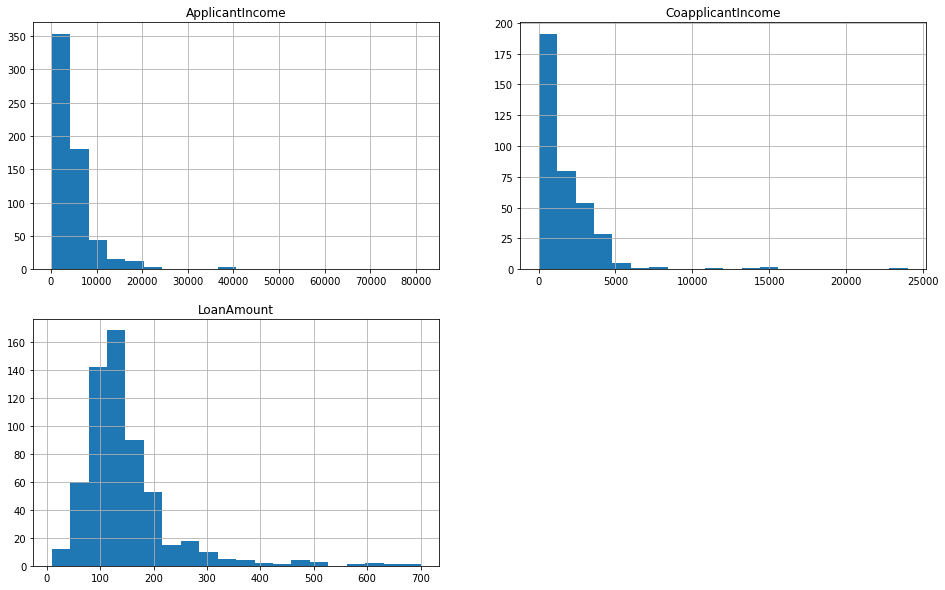

In [26]:
# Visualising the data before log transformation

ax1 = plt.subplot(221)
train['ApplicantIncome'].hist(bins=20, figsize=(16,10))
ax1.set_title("ApplicantIncome")

ax2 = plt.subplot(222)
test['CoapplicantIncome'].hist(bins=20)
ax2.set_title("CoapplicantIncome")

ax3 = plt.subplot(223)
train['LoanAmount'].hist(bins=20)
ax3.set_title("LoanAmount")

In [29]:
# visualising via interactive plotly graphs
# fig = px.histogram(train["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
# fig.update_layout(title="ApplicantIncome")
# fig.show()

# fig = px.histogram(train["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
# fig.update_layout(title="CoapplicantIncome")
# fig.show()

# fig = px.histogram(train["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
# fig.update_layout(title="LoanAmount")
# fig.show()

As observed, our data has varibles which have a bulk of the data at the left and the right tail is longer which is called as **right skewness (or positive skewness)**. 

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [32]:
#Getting log values for log tranformtion

train["ApplicantIncome"] = np.log(train["ApplicantIncome"])

#As "CoapplicantIncome" columns has some "0" values we will get log values except "0"

train["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in train["CoapplicantIncome"]]
train["LoanAmount"] = np.log(train["LoanAmount"])

In [35]:
#After Outlier Treatment and Coversion to normally distributed data

print("\nMean:\n")
print("ApplicantIncome: ",(train["ApplicantIncome"]).mean())
print("CoapplicantIncome: ",(train["CoapplicantIncome"]).mean())
print("LoanAmount: ",(train["LoanAmount"].mean()))

print("\nMode:\n")
print("ApplicantIncome: ",train["ApplicantIncome"].mode()[0])
print("CoapplicantIncome: ",train["CoapplicantIncome"].mode()[0])
print("LoanAmount: ",train["LoanAmount"].mode()[0])

print("\nMedian:\n")
print("ApplicantIncome: ",(train["ApplicantIncome"]).median())
print("CoapplicantIncome: ",(train["CoapplicantIncome"]).median())
print("LoanAmount: ",(train["LoanAmount"].median()))

print("\nStandard Deviation:\n")
print("ApplicantIncome: ",(train["ApplicantIncome"]).std())
print("CoapplicantIncome: ",(train["CoapplicantIncome"]).std())
print("LoanAmount: ",(train["LoanAmount"].std()))


Mean:

ApplicantIncome:  8.341213093227006
CoapplicantIncome:  4.289733227820409
LoanAmount:  4.857444178729352

Mode:

ApplicantIncome:  7.824046010856292
CoapplicantIncome:  0.0
LoanAmount:  4.787491742782046

Median:

ApplicantIncome:  8.246040412315828
CoapplicantIncome:  7.080283635438671
LoanAmount:  4.852030263919617

Standard Deviation:

ApplicantIncome:  0.6452632025094259
CoapplicantIncome:  3.8756799760365634
LoanAmount:  0.5051420701855587


Text(0.5, 1.0, 'LoanAmount')

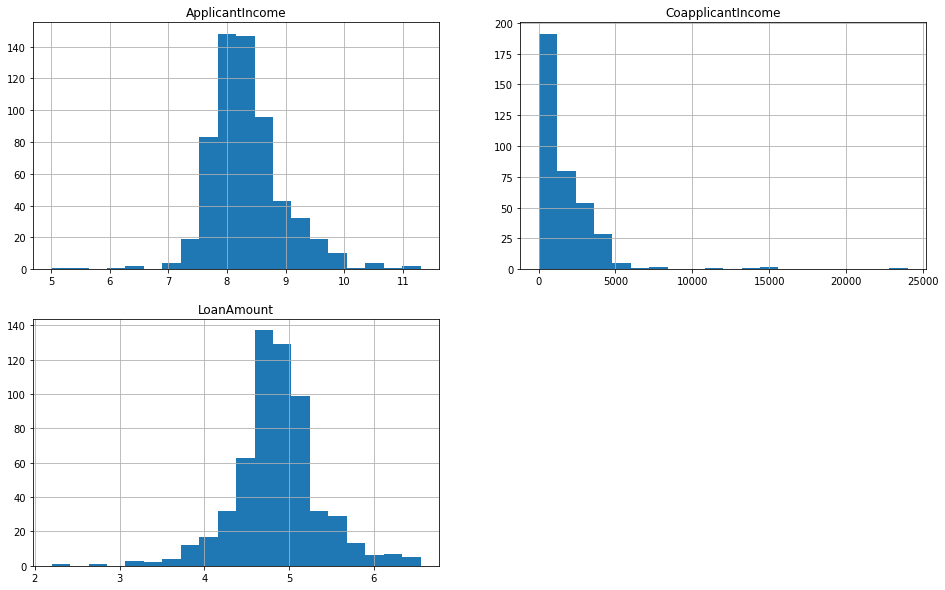

In [36]:
# Visualising the data after log transformation

ax1 = plt.subplot(221)
train['ApplicantIncome'].hist(bins=20, figsize=(16,10))
ax1.set_title("ApplicantIncome")

ax2 = plt.subplot(222)
test['CoapplicantIncome'].hist(bins=20)
ax2.set_title("CoapplicantIncome")

ax3 = plt.subplot(223)
train['LoanAmount'].hist(bins=20)
ax3.set_title("LoanAmount")

As we can observe, Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

In [37]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Rate_of_Interest,Purpose,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
S.No.,,,,,,,,,,,,,,,
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,NaN,0.1189,debt_consolidation,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,0.1071,credit_card,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,0.1357,debt_consolidation,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,0.1008,debt_consolidation,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,0.1426,credit_card,360.0,1.0,Urban,Y


_---- Minor Project Review Final -----_

# Model Development